<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Linear_%26_Non_Linear_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Theory***

The original SVM algorithm was invented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in ***1963***. In ***1992***, Bernhard Boser, Isabelle Guyon and Vladimir Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. 

All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. Sounds simple enough, but there’s an infinite amount of lines to choose from. 

How do we know which line will do the best job of classifying the data? This is where the LSVM algorithm comes in to play.

The LSVM algorithm will select a line that not only separates the two classes but stays as far away from the closest samples as possible.
 
In fact, the “**support vector**” in “**support vector machine**” refers to two position vectors drawn from the origin to the points which dictate the decision boundary. **bold text**

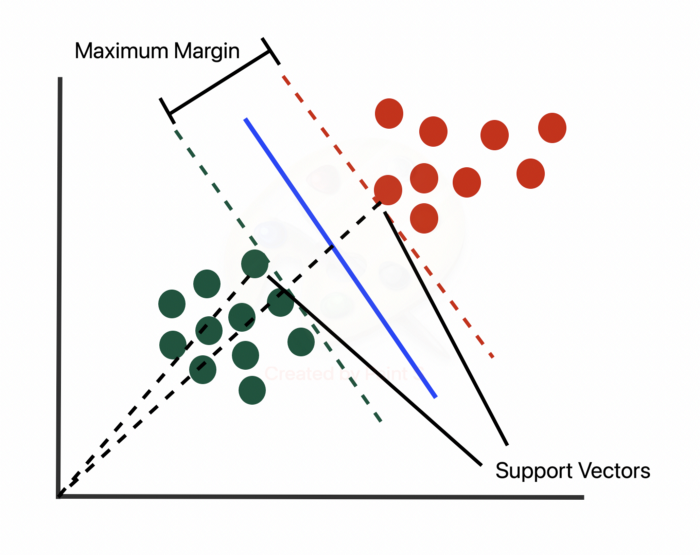

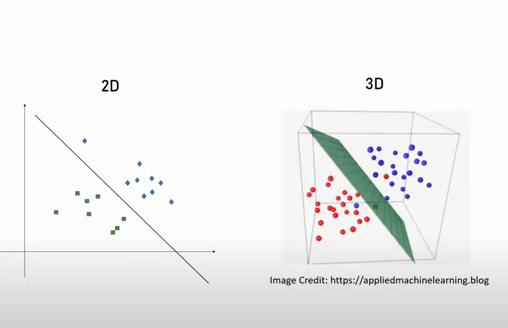

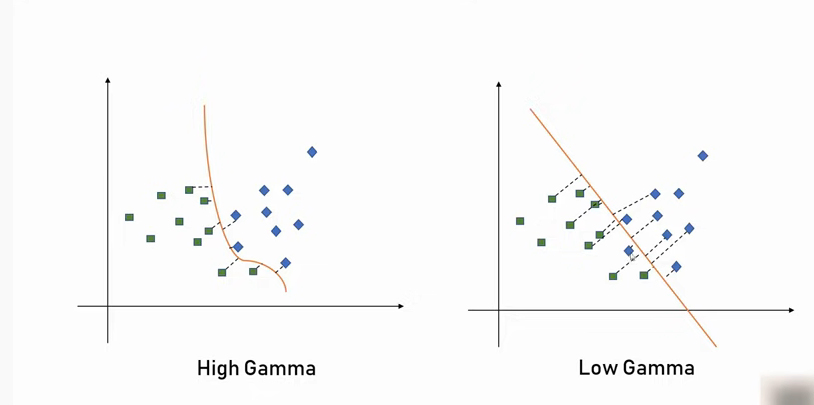

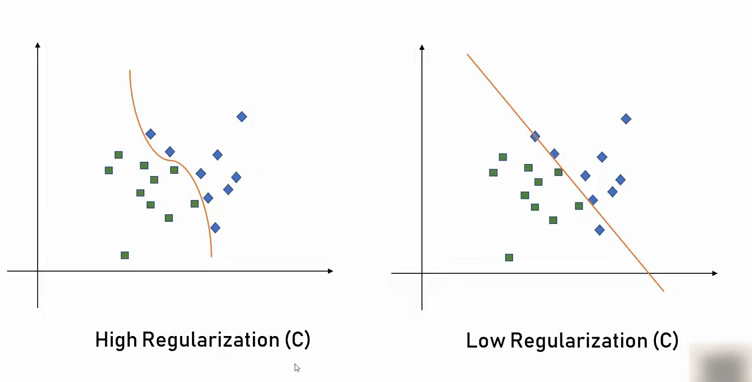

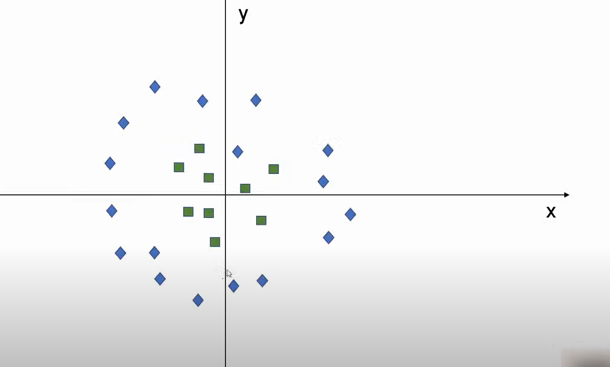

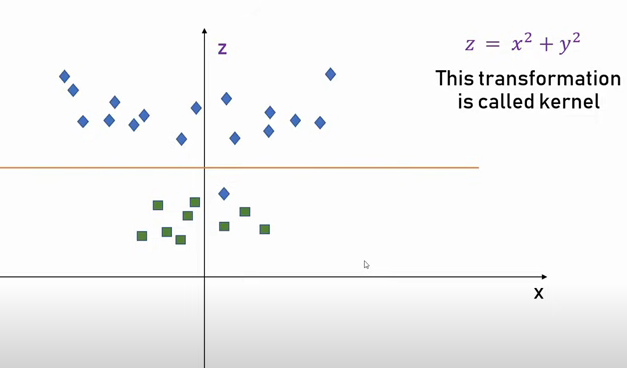

# Library

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

# Data

In [2]:
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/SVM'
df = pd.read_csv('/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/SVM/mtcars.csv')
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mtcars.csv  mtcars.xlsx


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Unnamed: 12
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,NaN
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,NaN
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,NaN
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,NaN
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,NaN


In [3]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb', 'Unnamed: 12'],
      dtype='object')

In [4]:
df= df.drop('Unnamed: 12', axis=1)
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

# Exploratory Data Analysis 

In [5]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [6]:
# mapping automatic and manual modes in the am column
df.am = df.am.map({0:'automatic',1:'manual'})

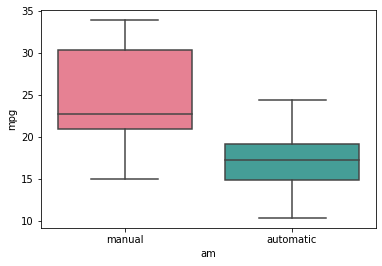

In [7]:
sns.boxplot(data = df, x = df['am'], y = df['mpg'], palette='husl')

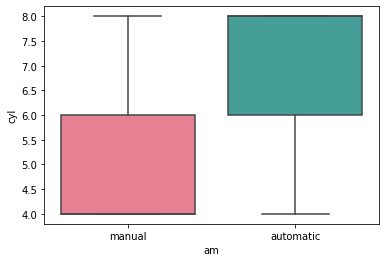

In [8]:
sns.boxplot(data = df, x = df['am'], y = df['cyl'], palette='husl')

In [9]:
X = df.drop(['am','model'], axis=1)
y = df.am

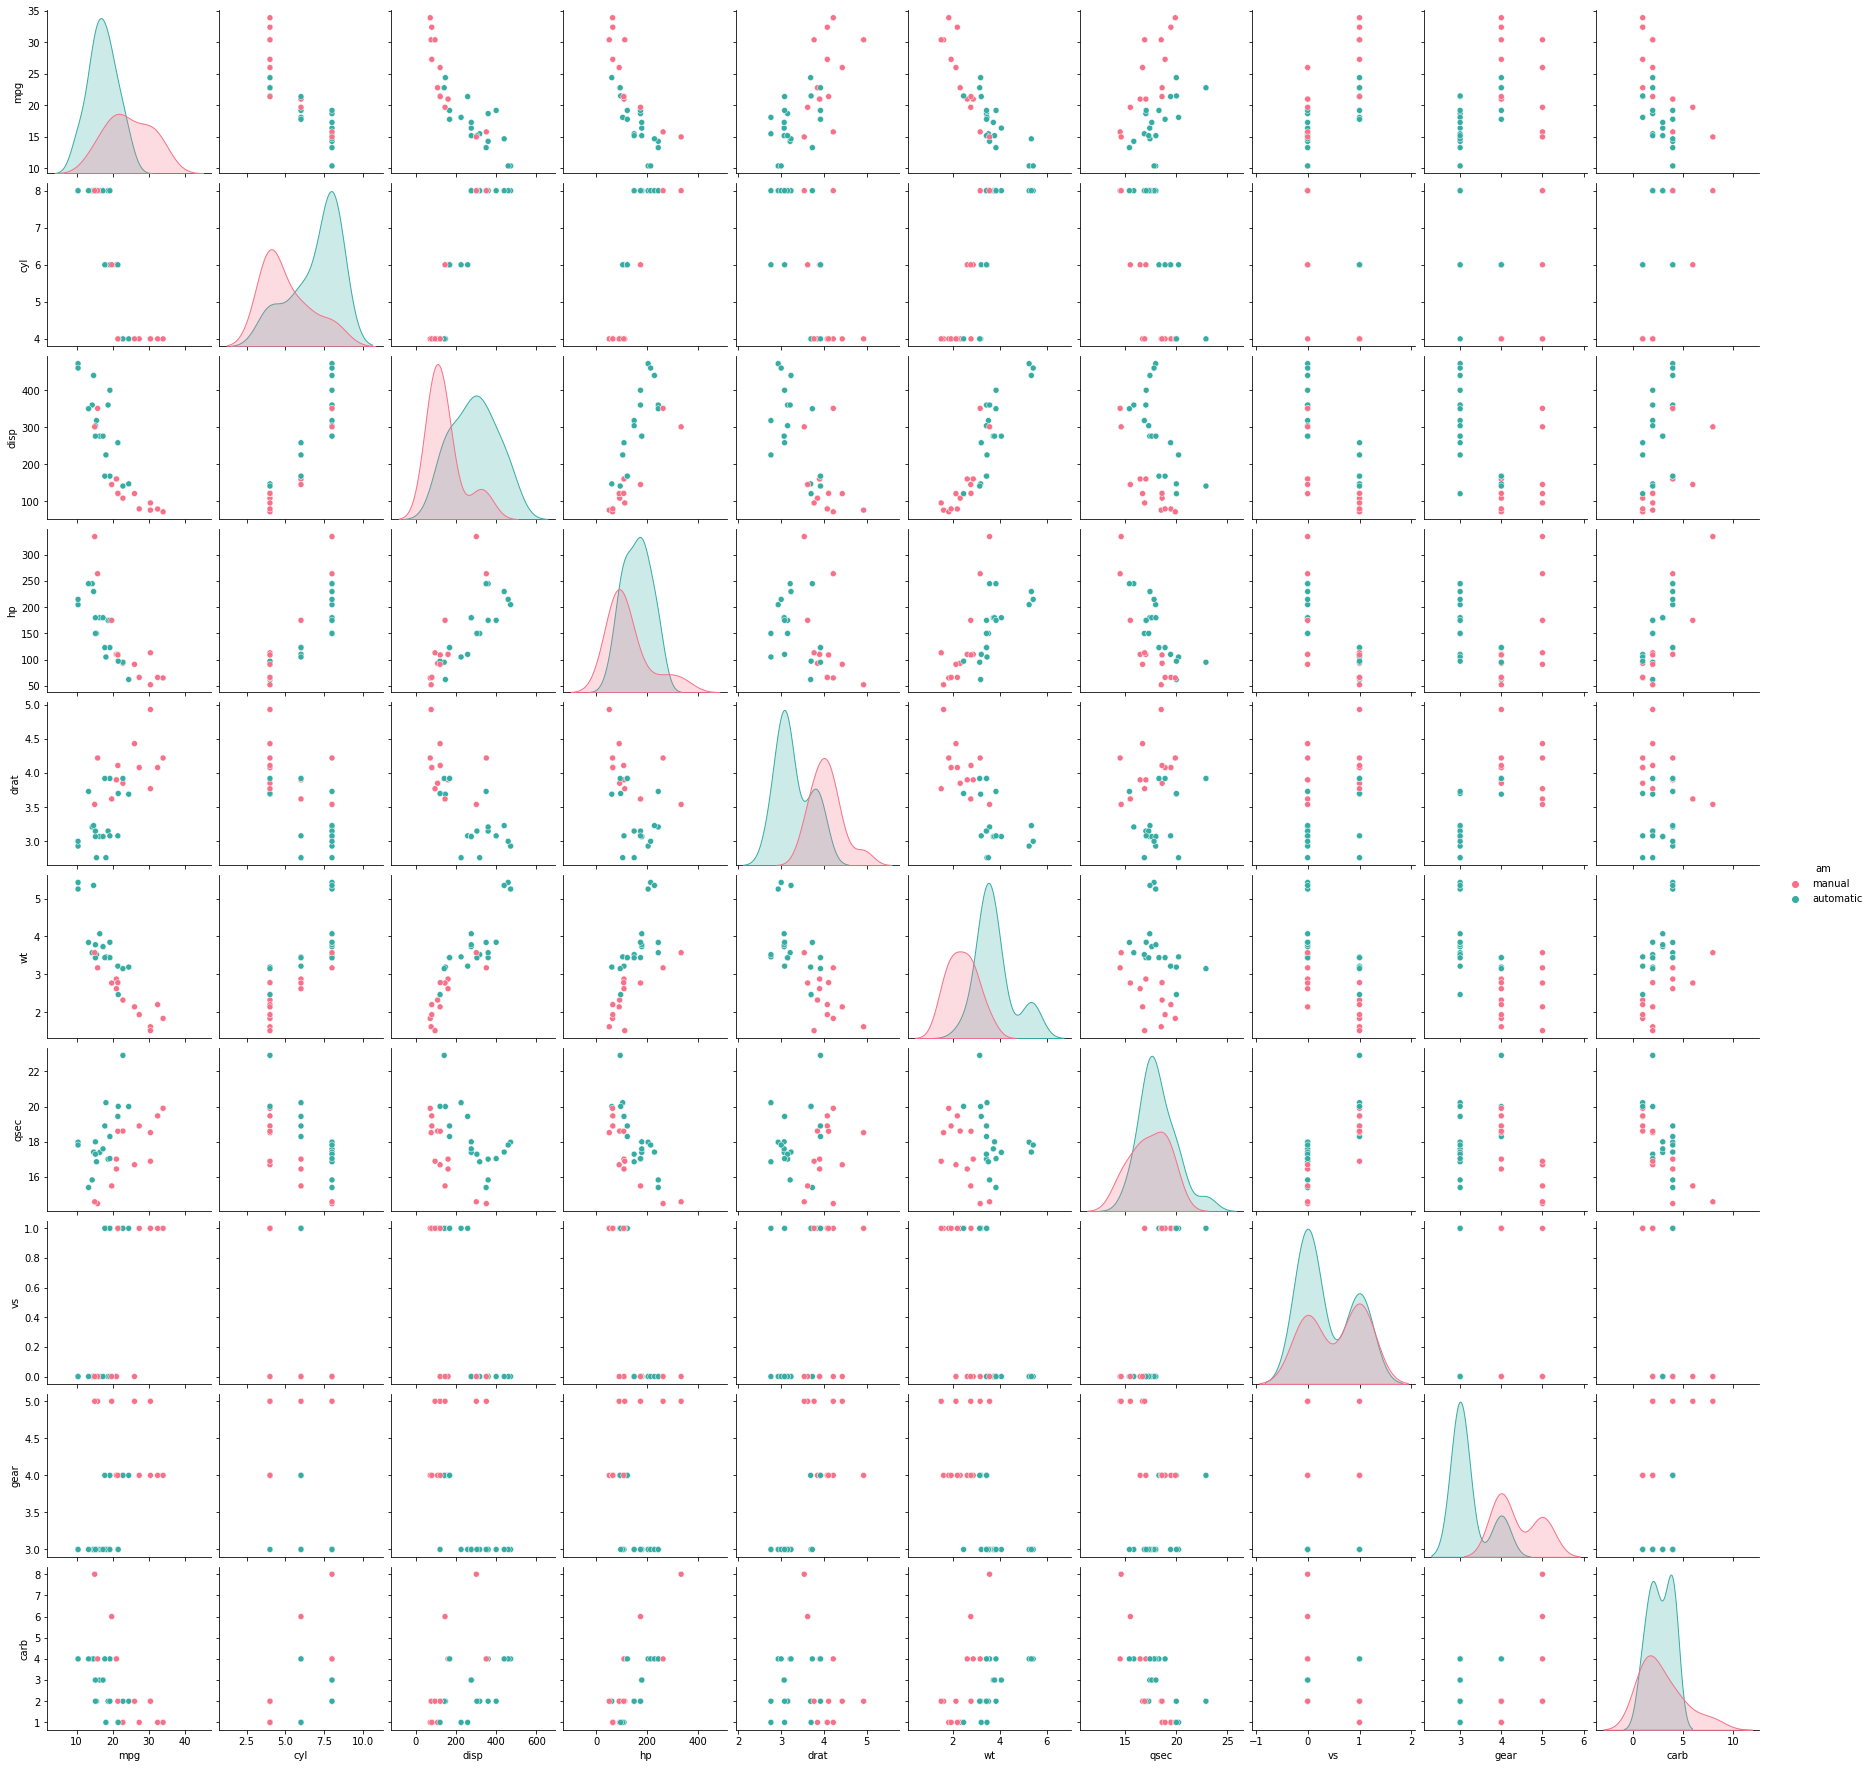

In [10]:
sns.pairplot(data = df, hue= 'am', palette = 'husl')

# Splitting data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#SVM model building

In [12]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train,y_train), svm.score(X_test,y_test)

(0.7916666666666666, 0.75)

In [13]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4, 1],
       [1, 2]])

# [Detailed model ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [15]:
svm = SVC(kernel='linear',C=1 ,gamma = 'auto',verbose=True,random_state=123)
svm.fit(X_train, y_train)
svm.score(X_train,y_train), svm.score(X_test,y_test)

[LibSVM]

(1.0, 0.875)

In [28]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cost = [0.001,0.01,0.1,1,10,100]
best_params = {'kernels':'linear', 'cost':0}
best_score =0
for i in kernels:
    for j in cost:
        svm = SVC(kernel=i,C=j ,gamma = 1,verbose=True,random_state=123)
        svm.fit(X_train, y_train)
        svm.score(X_train,y_train), svm.score(X_test,y_test)
        if  svm.score(X_test,y_test)>best_score:
            best_score= svm.score(X_test,y_test)
            best_params['kernels']=i
            best_params['cost']=j

        

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [29]:
best_score, best_params

(1.0, {'kernels': 'poly', 'cost': 0.001})

# Grid search CV

In [26]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.600 total time=   0.0s
[CV 2/5] END .....C=0.001, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.001, gamma=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.001, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.001, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [27]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}
SVC(C=0.001, gamma=1, kernel='poly')


In [23]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

   automatic       0.71      1.00      0.83         5
      manual       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



# FAQs

#**Should I normalize data for SVM?**
Prescaling/normalization/whitening

SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important


# **When should SVM not be used?**

SVM algorithm is not suitable for large data sets. SVM does not perform very well when the data set has more noise i.e. target classes are overlapping. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.

# ***What are the advantages of using SVM?***

Support vector machine works comparably well when there is an understandable margin of dissociation between classes. It is more productive in high dimensional spaces. It is effective in instances where the number of dimensions is larger than the number of specimens


# ***Why do we use SVM for classification?***

The reason: SVM is one of the most robust and accurate algorithm among the other classification algorithms. SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

# ***Which kernel is best for SVM?***
Gaussian Radial Basis Function (RBF)

It is one of the most preferred and used kernel functions in svm